## 37. DATA WRANGLING

In [1]:
#Manejo de datos - lA CIRUGIA DE DATOS
#Cortar datos, poner los datos en algun lado. 
#Alguien que se dedica a esto, debe de ser muy cuidadoso, parte muy importante en el manejo de datos. 
#cortar tablas de datasets, unirlas, subdivir un dframe, seleccionar un par de filas y columnas. 


## 40. BUSCAR UN SUBCONJUNTO DE DATOS DE UN DATASET

In [33]:
#Extraer un subconjunto de datos 
import pandas as pd

In [34]:
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)\datasets/customer-churn-model/Customer Churn Model.txt")


In [9]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Crearemos un subconjunto de datos, lo extraeremos. 
Usar aquello que nos interese util par ami modelo de datos, saber seleccionar un determinado numero de columnas. 


In [10]:
#Buscaremos cuantas filas tiene una determinada variable del dataset. 
account_length = data["Account Length"] #Esta sintaxis es la mas basica para extraer un subconjunto en formato de columna.

In [12]:
account_length #Aqui mostramos la informacion de esa columna, en formato vector. 

0       128
1       107
2       137
3        84
4        75
       ... 
3328    192
3329     68
3330     28
3331    184
3332     74
Name: Account Length, Length: 3333, dtype: int64

In [13]:
#Cuando seleccionamos una sola columna, no es un dataframe, es un objeto de tipo series o vectores, consisten en los numeros de la col
#columna seleccionado, no se puede usar funciones de datasets. 
type(account_length)

pandas.core.series.Series

In [16]:
#Para extraer mas de una columna: 
subset = data[["Account Length", "Phone", "Eve Charge", "Day Calls"]]

In [17]:
subset.head() #Subconjunto de los datos, ahora tiene la misma forma del dataset original ¿Que tipo de objeto tendra? 


,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [18]:
#el tipo de dato es : DataFrame
type(subset)

pandas.core.frame.DataFrame

In [23]:
#Podemos crear una lista de las columnas que necesitamos y pasarle la lista como nombre del parametro dentro del corchete
#lo haremos en dos fases: 
desired_columns = ["Account Length", "Phone", "Eve Charge", "Day Calls"]
subset = data[desired_columns]
subset.head() #Util para hacer subconjuntos de datos. 

,Account Length,Phone,Eve Charge,Day Calls
0,128,382-4657,16.78,110
1,107,371-7191,16.62,123
2,137,358-1921,10.30,114
3,84,375-9999,5.26,71
4,75,330-6626,12.61,113


In [24]:
#Hay otra forma de hacer la seleccion de columnas, en caso de tener muchas variables de interes. 
#Lo podemos hacer por complementos. 
#Suponer que queremos: 
desired_columns = ["Account Length", "VMail Message", "Day Calls"]
desired_columns 

['Account Length', 'VMail Message', 'Day Calls']

In [25]:
all_columns_list = data.columns.values.tolist()
all_columns_list 

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [26]:
#Si nosotros queremos quedarnos con el complementario con las que le faltan, quitando las de account_length. es hacer una lista: 
sublist = [x for x in all_columns_list if x not in desired_columns]
sublist #Nos quedamos con todas excepto las que hemos quitado, a traves de conjuntos complementarios. 

['State',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'Day Mins',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [27]:
subset = data[sublist]
subset.head() #Con esto lo podemos corrobar sin ningun problema. 

,State,Area Code,Phone,Int'l Plan,VMail Plan,Day Mins,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,415,382-4657,no,yes,265.1,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,371-7191,no,yes,161.6,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,358-1921,no,no,243.4,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,375-9999,yes,no,299.4,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,330-6626,yes,no,166.7,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [29]:
#Tambien podemos usar una diferencia de conjuntos: 
a = set(desired_columns)
b = set(all_columns_list)
sublist = b-a
sublist = list(sublist)

In [31]:
data[sublist] #Obtenemos el mismo resultado que en la parte de arriba. 

,Eve Charge,Intl Charge,Eve Mins,CustServ Calls,Day Charge,Churn?,Phone,State,Int'l Plan,Intl Mins,Night Calls,Intl Calls,VMail Plan,Day Mins,Eve Calls,Night Mins,Area Code,Night Charge
0,16.78,2.70,197.4,1,45.07,False.,382-4657,KS,no,10.0,91,3,yes,265.1,99,244.7,415,11.01
1,16.62,3.70,195.5,1,27.47,False.,371-7191,OH,no,13.7,103,3,yes,161.6,103,254.4,415,11.45
2,10.30,3.29,121.2,0,41.38,False.,358-1921,NJ,no,12.2,104,5,no,243.4,110,162.6,415,7.32
3,5.26,1.78,61.9,2,50.90,False.,375-9999,OH,yes,6.6,89,7,no,299.4,88,196.9,408,8.86
4,12.61,2.73,148.3,3,28.34,False.,330-6626,OK,yes,10.1,121,3,no,166.7,122,186.9,415,8.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,18.32,2.67,215.5,2,26.55,False.,414-4276,AZ,no,9.9,83,6,yes,156.2,126,279.1,415,12.56
3329,13.04,2.59,153.4,3,39.29,False.,370-3271,WV,no,9.6,123,4,no,231.1,55,191.3,415,8.61
3330,24.55,3.81,288.8,2,30.74,False.,328-8230,RI,no,14.1,91,6,no,180.8,58,191.9,510,8.64
3331,13.57,1.35,159.6,2,36.35,False.,364-6381,CT,yes,5.0,137,10,no,213.8,84,139.2,510,6.26


## 42. SUBCONJUTOS DE FILAS CON CIERTAS CONDICIONES 

In [32]:
#Podemos indicar tambien el nombre de la fila. 
data[1:25] #nos quedamos con las primeras 25 filas de informacion. 


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.


In [33]:
data[10:35] #Aqui tenemos 25 valores. 

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
11,RI,74,415,344-9403,no,no,0,187.7,127,31.91,...,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False.
12,IA,168,408,363-1107,no,no,0,128.8,96,21.90,...,71,8.92,141.1,128,6.35,11.2,2,3.02,1,False.
13,MT,95,510,394-8006,no,no,0,156.6,88,26.62,...,75,21.05,192.3,115,8.65,12.3,5,3.32,3,False.
14,IA,62,415,366-9238,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,False.
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
16,ID,85,408,350-8884,no,yes,27,196.4,139,33.39,...,90,23.88,89.3,75,4.02,13.8,4,3.73,1,False.
17,VT,93,510,386-2923,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False.
18,VA,76,510,356-2992,no,yes,33,189.7,66,32.25,...,65,18.09,165.7,108,7.46,10.0,5,2.70,1,False.
19,TX,73,415,373-2782,no,no,0,224.4,90,38.15,...,88,13.56,192.8,74,8.68,13.0,2,3.51,1,False.


In [37]:
#Otro hecho muy importante es utilizando un formato de filas condicional o un subconjunto booleano. 
#filas que cumplan cierta condicion: 
#Intentar filtrar usuarios con Total Mins > 500, hablando de filas que cumplan esa condicion
data1 = data[data["Day Mins"] >200] 
data1 #Hemos extraido un subconjunto donde los minutos del dia superan los 300. 


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,SC,181,408,406-6304,no,no,0,229.9,130,39.08,...,93,12.27,262.4,110,11.81,14.2,4,3.83,2,False.
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


In [38]:
#Obtener usuarios unicamanete de New York. 
data2 = data[data["State"] =="NY"]
data2 #Solamente hay 83 filas, hemos obtenido un dataframe mas pequeño. 

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
77,NY,144,408,360-1171,no,no,0,61.6,117,10.47,...,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True.
136,NY,75,415,374-8525,no,yes,21,175.8,97,29.89,...,106,18.49,237.5,134,10.69,5.3,4,1.43,5,False.
182,NY,67,408,405-2888,no,yes,36,115.6,111,19.65,...,94,20.20,169.9,103,7.65,9.9,12,2.67,2,False.
186,NY,106,408,422-1471,no,no,0,158.7,74,26.98,...,139,5.47,198.5,103,8.93,10.2,4,2.75,1,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3219,NY,150,415,421-6268,no,yes,35,139.6,72,23.73,...,170,28.29,213.8,105,9.62,8.8,2,2.38,2,False.
3227,NY,209,415,369-8703,no,no,0,153.7,105,26.13,...,87,16.03,200.8,95,9.04,10.7,2,2.89,0,False.
3257,NY,171,415,412-6245,no,no,0,137.5,110,23.38,...,109,16.84,292.7,131,13.17,13.3,5,3.59,2,False.
3275,NY,120,510,405-5083,no,yes,27,128.5,115,21.85,...,91,13.91,242.9,121,10.93,0.0,0,0.00,1,False.


In [40]:
#AND = &  se cumplen las dos condiciones a la vez. 
data3 = data[(data["Day Mins"]>300) & (data["State"] =="NY")]
data3 #Solo hay dos filas que cumplen las dos condiciones a la vez. 

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True.


In [43]:
#OR = | Una u otra condicion 
data4 = [(data["Day Mins"] > 300) | (data["State"] == "NY")]
data4

[0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 3328    False
 3329    False
 3330    False
 3331    False
 3332    False
 Length: 3333, dtype: bool]

## 43. SUBCONJUNTOS DE LOC E ILCO Y CREACION DE NUEVAS COLUMNAS 

In [ ]:
#Lo que queremos hacer es ambas filtraciones a la vez, entre filas y columnas. 
#Solo hay que conocer la sintaxis. 

In [47]:
#Si queremos los minutos del dia y Longitud de la Cuenta(Columna) de los primeros 50 individuos(filas).  
subset_first_50 = data[["Day Mins", "Night Mins", "Account Length"]][:50]#El primero corchete es sobre las columnas, el Segundo es sobre las filas.
subset_first_50 

,Day Mins,Night Mins,Account Length
0,265.1,244.7,128
1,161.6,254.4,107
2,243.4,162.6,137
3,299.4,196.9,84
4,166.7,186.9,75
5,223.4,203.9,118
6,218.2,212.6,121
7,157.0,211.8,147
8,184.5,215.8,117
9,258.6,326.4,141


In [50]:
#Otra manera efectiva que hay que tener en cuenta. 
#Utilizar la sintaxis "ix" que nos proporciona un modo de asignar o consultar indices a la ves de filas y columnas, dentro de un solo corchete. 
data.iloc[1:10, 3:6] #Primeras 10 filas, Columnas 3 a la 6

,Phone,Int'l Plan,VMail Plan
1,371-7191,no,yes
2,358-1921,no,no
3,375-9999,yes,no
4,330-6626,yes,no
5,391-8027,yes,no
6,355-9993,no,yes
7,329-9001,yes,no
8,335-4719,no,no
9,330-8173,yes,yes


In [ ]:
data.iloc(:, 3:6) #Todas las filas para columnas entre la 3 y la 6. 
data.iloc(1:10, :) #Todas las columna para las filas de la 1 a la 10. 
data.iloc(1:10, [2,5,7]) #Tenemos las 10 primeras filas para las columnas 2,5 y 7. 

In [51]:
data.iloc[[1,5,8,36], [2,5,7]] #Obtiene un subconjunto de filas y columnas respectivamente. 

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
5,510,no,223.4
8,408,no,184.5
36,408,yes,146.3


In [53]:
data.loc[[1,5,8,36], ["Area Code", "VMail Plan", "Day Mins" ]]

,Area Code,VMail Plan,Day Mins
1,415,yes,161.6
5,510,no,223.4
8,408,no,184.5
36,408,yes,146.3


In [55]:
#Si se requiere que creemos una nueva columna. 
data["Total Mins"] = data["Day Mins"] + data["Eve Mins"] + data["Night Mins"]

In [56]:
data["Total Mins"].head()

0    707.2
1    611.5
2    527.2
3    558.2
4    501.9
Name: Total Mins, dtype: float64

In [58]:
data["Total Calls"] = data["Day Calls"] + data["Night Calls"] + data["Eve Calls"]

In [59]:
data["Total Calls"].head()

0    300
1    329
2    328
3    248
4    356
Name: Total Calls, dtype: int64

In [1]:
#si vemos el dataframe original, vemos que ya se han creado dos columnas. 
data.head()

NameError: name 'data' is not defined

## 44. GENERAR NUMEROS ALEATORIOS 

In [2]:
#Lo que hace el ordenador es tomar una semilla y en base a ella genera de muchas veces, un patron que se repetira. 
#Los llamamos numeros aletorios cuando se deberian de llamar pseudoaletorios porque pueden llegar a predecirse. 
#Se usa el metodo random. 
import numpy as np 

In [3]:
np.random.randint(1,100) #Numero aleatorio entre 1 y 100. 

39

In [16]:
range(8) #Esta funcion simboliza un array que empieza en 1 y acaba en 8. 

range(0, 8)

In [7]:
#Funcion que genera una lista de n numeros aleatoios enteros dentro del intervalo [a,b]
def randint_list(n, a, b):
    x = []
    for i in range(n): #Cada uno de los elementos del array que va de 1 a n, simboliza una posicion dentro de la lista de x
        x.append(np.random.randint(a,b)) #o que hace esta funcion es que agrega n numeros aleatorios a la lista de x, 
    return x

In [11]:
randint_list(25,1,50) #Con esto generamos 25 elementos aleatorios, en una lista numeros entre 1 y 50. 

[45,
 30,
 22,
 3,
 27,
 12,
 48,
 46,
 47,
 9,
 31,
 12,
 42,
 24,
 36,
 26,
 5,
 20,
 20,
 46,
 23,
 15,
 19,
 48,
 25]

In [17]:
#Hay una funciion que ya hace esto de manera automatica: 
import random

In [21]:
for i in range(10):
    print(random.randrange(1,100,7))

92
29
43
50
1
29
64
99
99
29


In [25]:
a = np.arange(100)
a #Esto lo que crea es un array de objetos del 0 al 99. 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [39]:
column_list = data.columns.values.tolist()
column_list #Elegiremos una columna al azar de aqui

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [40]:
np.random.choice(column_list) #Esto genera elige una de las 21 al azar. 

'Account Length'

In [ ]:
#Crearemos una funcion que nos genere 5 nombres de dicho array que tenemos arriba. 

In [43]:
def randint_list1(n):
    y = []
    for i in range(n):
         y.append(np.random.choice(column_list))
    return y

In [49]:
randint_list1(15)

['CustServ Calls',
 'Eve Calls',
 'CustServ Calls',
 'Day Calls',
 'Churn?',
 'Churn?',
 'Account Length',
 'Eve Charge',
 'Intl Charge',
 'Day Calls',
 'Intl Calls',
 'Churn?',
 'Eve Charge',
 'Churn?',
 'Eve Charge']

## 45. LA SEMILLA DE LA GENERACION ALEATORIA

In [50]:
#Para que se puedan producir los experimentos, fijar un resultado aleatorio. 
#Se debe de fijar la semilla de la aleatoridad. 
#SEED 
np.random.seed(2018)
for i in range(5):
    print(np.random.random()) #Con la semilla fijamos estos resultados. 

0.8823493117539459
0.10432773786047767
0.9070093335163405
0.3063988986063515
0.446408872427422


## 47. LA DISTRIBUCION UNIFORME 

In [58]:
import numpy as np 
import matplotlib.pyplot as plt

In [68]:
a = 1
b = 100
n = 100000
    


In [69]:
 data = np.random.uniform(a, b, n)  #200 datos que se distribuyen de manera uniforme. 

In [63]:
%matplotlibe inline 


UsageError: Line magic function `%matplotlibe` not found.


(array([ 9924.,  9942., 10142., 10087., 10024., 10060., 10041.,  9781.,
        10123.,  9876.]),
 array([ 1.00057169, 10.90032078, 20.80006987, 30.69981895, 40.59956804,
        50.49931713, 60.39906621, 70.2988153 , 80.19856439, 90.09831347,
        99.99806256]),
 <a list of 10 Patch objects>)

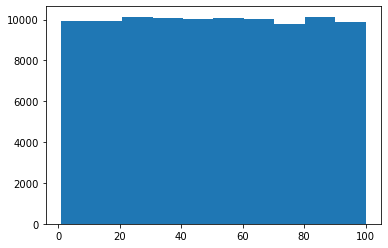

In [70]:
plt.hist(data) #Ya empieza a parecerse a una distribucion uniforme. 

## 48. LA DISTRIBUION NORMAL

In [93]:
data = np.random.randn(100)

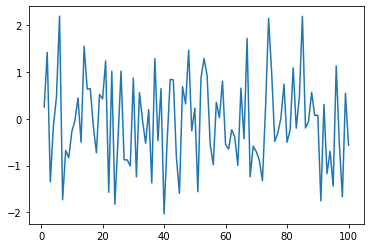

In [72]:
x = range(1,101)
plt.plot(x, data)

(array([ 5.,  9.,  9., 19., 16., 11., 15.,  9.,  4.,  3.]),
 array([-2.03226533, -1.60975094, -1.18723655, -0.76472216, -0.34220777,
         0.08030663,  0.50282102,  0.92533541,  1.3478498 ,  1.77036419,
         2.19287858]),
 <a list of 10 Patch objects>)

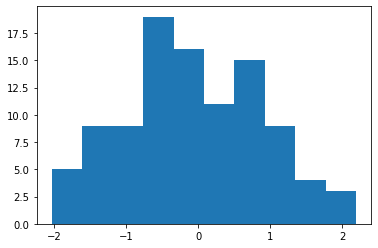

In [76]:
plt.hist(data)

## 50. GENERANDO DUMMY DATA FRAMES 

Es un array de numeros aleatorios generados a traves de varios metodos, cada una de dichos metodos obtiene un vector columna, 
que pasara a ser la columna del dataframe, 


In [3]:
#Construiremos un dataframe dummy 
#Dummy Data Sets
import pandas as pd
import numpy as np


In [13]:
import matplotlib.pyplot as plt

In [5]:
data = pd.DataFrame(
{
    'A' : np.random.randn(10),
    'B' : 1.5 + 2.5 + np.random.randn(10), 
    'C' : np.random.uniform(5, 32, 10)
}
)

In [7]:
data

,A,B,C
0,0.432757,3.285381,24.989158
1,0.127097,4.027741,6.828637
2,0.147980,3.165210,23.216591
3,0.246278,3.666994,19.645012
4,0.202759,3.183443,18.534583
5,0.035913,4.078809,15.148193
6,-0.449267,4.110447,24.124683
7,-1.482818,5.873571,13.012316
8,-0.138576,2.652962,17.143293
9,-0.052698,3.808911,12.034248


In [8]:
data.describe()

,A,B,C
count,10.000000,10.000000,10.000000
mean,-0.093057,3.785347,17.467672
std,0.544095,0.875908,5.848687
min,-1.482818,2.652962,6.828637
25%,-0.117106,3.208928,13.546285
50%,0.081505,3.737953,17.838938
75%,0.189065,4.066042,22.323697
max,0.432757,5.873571,24.989158


(array([1., 0., 0., 0., 0., 1., 0., 3., 3., 2.]),
 array([-1.48281768, -1.29126025, -1.09970281, -0.90814538, -0.71658795,
        -0.52503051, -0.33347308, -0.14191565,  0.04964179,  0.24119922,
         0.43275665]),
 <a list of 10 Patch objects>)

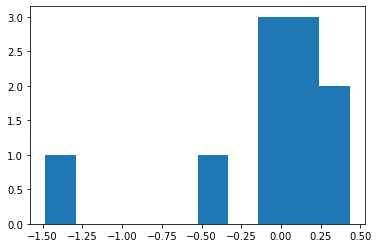

In [14]:
plt.hist(data["A"])

In [18]:
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/customer-churn-model/Customer Churn Model.txt")

In [19]:
colum_names = data.columns.values.tolist()

In [20]:
a = len(colum_names)
a

21

In [21]:
new_data = pd.DataFrame(
{
    'Column Name' : colum_names,
    'A' : np.random.randn(a), 
    'B' : np.random.uniform(0, 1, a)
}
)

In [22]:
new_data

,Column Name,A,B
0,State,-1.135145,0.434247
1,Account Length,1.080209,0.607482
2,Area Code,0.227904,0.376064
3,Phone,-0.746076,0.701879
4,Int'l Plan,0.821607,0.404733
5,VMail Plan,0.208346,0.102900
6,VMail Message,0.403690,0.848833
7,Day Mins,-1.028453,0.232663
8,Day Calls,-0.066244,0.695804
9,Day Charge,0.823117,0.398499


## 51. UN DUMMY DATA FRAME CON VARIABLES CATEGORICAS 

Agrupar, Filtrar y transformar los dataframes. 

In [99]:
#Agregacion de datos por categoria 
import numpy as np 
import pandas as pd 


In [100]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [101]:
#Generaremos dos colecciones de ingreso y genero. 
n= 500 #Necesitamos generar 500 datos aleatorios para esas variables. 
gender_data = []
income_data = [] 

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [27]:
gender_data #En formato lista. 

['Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Fem

In [28]:
income_data

['Middle Class',
 'Rich',
 'Rich',
 'Poor',
 'Middle Class',
 'Rich',
 'Poor',
 'Poor',
 'Middle Class',
 'Rich',
 'Middle Class',
 'Rich',
 'Poor',
 'Poor',
 'Rich',
 'Poor',
 'Rich',
 'Poor',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Poor',
 'Middle Class',
 'Rich',
 'Rich',
 'Middle Class',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Rich',
 'Rich',
 'Rich',
 'Poor',
 'Rich',
 'Middle Class',
 'Poor',
 'Rich',
 'Rich',
 'Poor',
 'Rich',
 'Rich',
 'Rich',
 'Rich',
 'Middle Class',
 'Poor',
 'Middle Class',
 'Rich',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Rich',
 'Poor',
 'Rich',
 'Poor',
 'Poor',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Rich',
 'Rich',
 'Rich',
 'Rich',
 'Middle Class',
 'Poor',
 'Poor',
 'Poor',
 'Middle Class',
 'Poor',
 'Poor',
 'Poor',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Poor',
 'Middle Class',
 'Poor',
 'Poor',
 'Rich',
 'Middle Class',
 'Rich',
 'Middle 

In [121]:
#Si lo queremos hacer con datos numericos 
height = 160 + 30 *np.random.randn(n) #160 es media, 30 desviacion tipica 
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 - np.random.randn(n)

In [128]:
data = pd.DataFrame(
    {
        'Gender' : gender_data, 
        'Economic Status' : income_data, 
        'Height' : height, 
        'Weight' : weight,
        'Age' : age, 
        'Income' : income
    
}
)

In [10]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,151.347291,100.678025,42.062951,21499.975843
1,Male,Poor,134.559133,0.099864,51.286688,21500.299958
2,Female,Poor,179.380337,80.396117,52.427850,21498.666359
3,Male,Poor,221.139830,67.390708,26.641977,21501.087111
4,Male,Middle Class,154.820297,125.403275,40.685109,21501.247584


## 52. AGRUPACION DE LOS DATOS POR CATEGORIA 

In [129]:
#Agrupacion de datos 
data.groupby("Gender") #Nombre de la columna de la cual queremos hacer la agrupacion. 
#El resultado es un objeto interno de Pandas. 
#Crea un objeto llamado groupby que tendra 2 atributos, uno sera el nombre y el otro el atributo. 

In [12]:
#Para acceder a ellos: 
grouped_gender = data.groupby("Gender")

In [13]:
grouped_gender.groups #Los numeros indican la fila a la que pertenece cada grupo, eje : en la fila 2 esta el grupo "Female"



{'Female': Int64Index([  2,   7,   8,   9,  12,  14,  15,  16,  18,  19,
             ...
             480, 482, 483, 484, 488, 489, 494, 496, 498, 499],
            dtype='int64', length=249),
 'Male': Int64Index([  0,   1,   3,   4,   5,   6,  10,  11,  13,  17,
             ...
             481, 485, 486, 487, 490, 491, 492, 493, 495, 497],
            dtype='int64', length=251)}

In [14]:
for names, groups in grouped_gender :  #Imprime todas las mujeres y todos los hombres. 
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
2    Female            Poor  179.380337   80.396117  52.427850  21498.666359
7    Female            Poor  137.266777   64.143758  20.221440  21500.304374
8    Female    Middle Class  182.295918   34.442721  28.545499  21500.141478
9    Female            Poor  213.927819   75.480378  34.201846  21498.959645
12   Female    Middle Class  139.520284   20.858250  34.310032  21499.623056
..      ...             ...         ...         ...        ...           ...
489  Female            Rich  138.882387   52.585669  28.020022  21499.321135
494  Female            Rich  165.648412  108.577795  33.830191  21499.795837
496  Female            Rich  142.723450  107.076677  42.113637  21498.613536
498  Female            Rich  148.734003   90.566238  21.168408  21499.385088
499  Female            Rich  141.944159   82.789593  22.250269  21502.065366

[249 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [15]:
#Para tener uno de ellos 
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
2,Female,Poor,179.380337,80.396117,52.427850,21498.666359
7,Female,Poor,137.266777,64.143758,20.221440,21500.304374
8,Female,Middle Class,182.295918,34.442721,28.545499,21500.141478
9,Female,Poor,213.927819,75.480378,34.201846,21498.959645
12,Female,Middle Class,139.520284,20.858250,34.310032,21499.623056
...,...,...,...,...,...,...
489,Female,Rich,138.882387,52.585669,28.020022,21499.321135
494,Female,Rich,165.648412,108.577795,33.830191,21499.795837
496,Female,Rich,142.723450,107.076677,42.113637,21498.613536
498,Female,Rich,148.734003,90.566238,21.168408,21499.385088


In [132]:
#Si queremos hacer la agrupacion de mas de una categoria: 
double_group = data.groupby(["Gender", "Economic Status"])

In [134]:
for names, group in double_group :  #Nos da 6 grupos en total 
    print(names)
    print(group)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
6    Female    Middle Class  128.224010  57.017156  23.777415  21500.819404
8    Female    Middle Class  190.510885  45.631460   7.765377  21499.205521
17   Female    Middle Class  226.185863  30.018487  31.099043  21501.603458
21   Female    Middle Class  159.603535  33.336380  44.933979  21499.564349
23   Female    Middle Class  255.435508  61.525121  26.405961  21500.462107
..      ...             ...         ...        ...        ...           ...
489  Female    Middle Class  135.161397  50.830699  23.966884  21499.031271
490  Female    Middle Class  202.827450  84.177428  47.080687  21498.370880
495  Female    Middle Class  133.558746  41.037260  34.350497  21498.594743
496  Female    Middle Class  170.550585  41.140271  28.516799  21498.718285
498  Female    Middle Class  144.856530  55.939367  21.867855  21498.781921

[102 rows x 6 columns]
('Female', 'Poor')
     Gender Econom

## 53. AGREGACION DE DATOS 

In [18]:
#Diversas formas de agregar datos a un dataframe. 
#agregar significa aplicar una funcion a todos y cada uno de los grupos a la vez. 

In [19]:
#OPERACIONES SOBRE DATOS AGRUPADOS. 
double_group.sum() 

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     11883.033082  4451.444811  2255.967535  1.548006e+06
       Poor             14426.694643  5915.645853  2679.921434  1.892005e+06
       Rich             14075.757945  5879.553623  2712.837845  1.913503e+06
Male   Middle Class     14049.154819  5784.936540  2472.736581  1.784495e+06
       Poor             15862.504988  6149.452472  3019.492185  2.128508e+06
       Rich             11567.831535  4842.061980  2067.064319  1.483487e+06

In [20]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     165.042126  61.825622  31.332882  21500.077895
       Poor             163.939712  67.223248  30.453653  21500.053256
       Rich             158.154584  66.062400  30.481324  21500.039164
Male   Middle Class     169.266926  69.698031  29.792007  21499.940757
       Poor             160.227323  62.115682  30.499921  21500.082244
       Rich             167.649732  70.174811  29.957454  21499.807562

In [21]:
double_group.size()

Gender  Economic Status
Female  Middle Class       72
        Poor               88
        Rich               89
Male    Middle Class       83
        Poor               99
        Rich               69
dtype: int64

In [23]:
double_group.describe()

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      72.0  165.042126  28.985438   76.611728  144.844477   
       Poor              88.0  163.939712  32.914388   78.770874  142.623276   
       Rich              89.0  158.154584  27.610943   97.912053  141.944159   
Male   Middle Class      83.0  169.266926  28.443092  101.356490  153.902823   
       Poor              99.0  160.227323  30.573962   90.011352  138.895845   
       Rich              69.0  167.649732  25.057889  117.132287  151.244861   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     167.791704  186.492858  227.622299   72.0  61.825622   
       Poor             163.102237  180.951221  241.070060   88.0  67.223248   
       Rich             158.129468  172.144895  229.000702   89.0  66.062400   
Male   Middle Class     168.205645  188.873939  235.379599   83.0  69.698031   
       Poor             159.287645  181.999583  225.884057   99.0  62.115682   
       Rich             168.864949  186.313846  219.217424   69.0  70.174811   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  40.470999  61.739114   72.0  21500.077895   
       Poor             ...  36.400266  67.166207   88.0  21500.053256   
       Rich             ...  38.174950  62.600560   89.0  21500.039164   
Male   Middle Class     ...  37.113205  59.533166   83.0  21499.940757   
       Poor             ...  36.253139  59.941891   99.0  21500.082244   
       Rich             ...  36.734168  61.287643   69.0  21499.807562   

                                                                            \
                             std           min           25%           50%   
Gender Economic Status                                                       
Female Middle Class     1.016251  21498.302599  21499.433335  21500.096760   
       Poor             1.070907  21497.933005  21499.359306  21500.027538   
       Rich             1.021830  21497.601344  21499.321135  21500.142022   
Male   Middle Class     0.869073  21498.046129  21499.253254  21500.036696   
       Poor             0.892393  21497.321167  21499.481050  21500.042089   
       Rich             1.018511  21497.564098  21499.065098  21499.685968   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     21500.971098  21502.300252  
       Poor             21500.782924  21502.065673  
       Rich             21500.708979  21502.065366  
Male   Middle Class     21500.533091  21501.655949  
       Poor             21500.679380  21502.505937  
       Rich             21500.392351  21502.637276  

[6 rows x 32 columns]

In [26]:
#Los objetos groupby se comportan como cualquier dataframe, en ese sentido se puede seleccionar cualquiera de las columnas: 
grouped_income = double_group["Income"]

In [27]:
grouped_income.describe()

count          mean       std           min  \
Gender Economic Status                                                
Female Middle Class      72.0  21500.077895  1.016251  21498.302599   
       Poor              88.0  21500.053256  1.070907  21497.933005   
       Rich              89.0  21500.039164  1.021830  21497.601344   
Male   Middle Class      83.0  21499.940757  0.869073  21498.046129   
       Poor              99.0  21500.082244  0.892393  21497.321167   
       Rich              69.0  21499.807562  1.018511  21497.564098   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     21499.433335  21500.096760  21500.971098  21502.300252  
       Poor             21499.359306  21500.027538  21500.782924  21502.065673  
       Rich             21499.321135  21500.142022  21500.708979  21502.065366  
Male   Middle Class     21499.253254  21500.036696  21500.533091  21501.655949  
       Poor             21499.481050  21500.042089  21500.679380  21502.505937  
       Rich             21499.065098  21499.685968  21500.392351  21502.637276

In [ ]:
#Si queremos aplicar otra funcion cualquiera. 


In [32]:
double_group.aggregate(  #Esto lo que hace es un agregado de las columnas que quiero a aplicarle la funcion que sea. 
    {
    "Income" : np.sum, 
        "Age" : np.mean,
        "Height" : np.std,
    
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.548006e+06  31.332882  28.985438
       Poor             1.892005e+06  30.453653  32.914388
       Rich             1.913503e+06  30.481324  27.610943
Male   Middle Class     1.784495e+06  29.792007  28.443092
       Poor             2.128508e+06  30.499921  30.573962
       Rich             1.483487e+06  29.957454  25.057889

In [36]:
#El metodo lambda para definir un metodo de calculo especifico 
double_group.aggregate(
{
    "Age" : np.mean,
    "Height" : lambda h:(np.mean(h))/np.std(h)
})

Age    Height
Gender Economic Status                     
Female Middle Class     31.332882  5.733925
       Poor             30.453653  5.009335
       Rich             30.481324  5.760421
Male   Middle Class     29.792007  5.987250
       Poor             30.499921  5.267316
       Rich             29.957454  6.739512

In [37]:
#Si le aplicamos la misma funcion a todas las columnas de golpe :
double_group.aggregate((np.sum, np.mean, np.std)) 

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     11883.033082  165.042126  28.985438  4451.444811   
       Poor             14426.694643  163.939712  32.914388  5915.645853   
       Rich             14075.757945  158.154584  27.610943  5879.553623   
Male   Middle Class     14049.154819  169.266926  28.443092  5784.936540   
       Poor             15862.504988  160.227323  30.573962  6149.452472   
       Rich             11567.831535  167.649732  25.057889  4842.061980   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     61.825622  28.397488  2255.967535  31.332882   
       Poor             67.223248  27.484359  2679.921434  30.453653   
       Rich             66.062400  24.561513  2712.837845  30.481324   
Male   Middle Class     69.698031  25.879571  2472.736581  29.792007   
       Poor             62.115682  24.739921  3019.492185  30.499921   
       Rich             70.174811  23.688972  2067.064319  29.957454   

                                         Income                          
                              std           sum          mean       std  
Gender Economic Status                                                   
Female Middle Class     12.763620  1.548006e+06  21500.077895  1.016251  
       Poor             13.007647  1.892005e+06  21500.053256  1.070907  
       Rich             11.712919  1.913503e+06  21500.039164  1.021830  
Male   Middle Class     11.864712  1.784495e+06  21499.940757  0.869073  
       Poor             11.212876  2.128508e+06  21500.082244  0.892393  
       Rich             12.462025  1.483487e+06  21499.807562  1.018511

## 54. FILTRADO, TRANSFORMACION Y OTRAS OPERACIONES UTILES 

In [38]:
#operaciones importantes. 
#filtrar elementos basado en diferentes caracteristicas. 
#FILTRADO DE DATOS 
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     11883.033082  4451.444811  2255.967535  1.548006e+06
       Poor             14426.694643  5915.645853  2679.921434  1.892005e+06
       Rich             14075.757945  5879.553623  2712.837845  1.913503e+06
Male   Middle Class     14049.154819  5784.936540  2472.736581  1.784495e+06
       Poor             15862.504988  6149.452472  3019.492185  2.128508e+06
       Rich             11567.831535  4842.061980  2067.064319  1.483487e+06

In [39]:
double_group["Age"].filter(lambda x: x.sum()>2400) #Elementos que pertencen a un grupo cuya suma de edades es mayor a 2400

1      51.286688
2      52.427850
3      26.641977
4      40.685109
5      20.011689
         ...    
491    37.039157
494    33.830191
496    42.113637
498    21.168408
499    22.250269
Name: Age, Length: 359, dtype: float64

In [ ]:
#TRANFORMACION DE VARIABLES 

In [46]:
#Para hacer una transformacion matematica 
#definimos 
xscore = lambda x : (x - x.mean())/x.std() 

In [47]:
double_group.transform(xscore)

,Height,Weight,Age,Income
0,-0.650591,1.287655,0.971391,0.165223
1,-0.839544,-2.506710,1.853830,0.243966
2,0.469115,0.479286,1.689329,-1.295067
3,1.992300,0.213219,-0.344064,1.126036
4,-0.507913,2.152479,0.918109,1.503702
...,...,...,...,...
495,2.057942,0.127540,-0.374704,-0.434762
496,-0.558877,1.669860,0.993118,-1.395171
497,-1.899597,0.987143,-1.247210,0.389282
498,-0.341190,0.997652,-0.795098,-0.640103


In [49]:
x_group = double_group.transform(xscore)

In [50]:
import matplotlib.pyplot as plt

(array([  5.,   8.,  44.,  75., 121., 110.,  77.,  30.,  18.,  12.]),
 array([-2.91275888, -2.33924476, -1.76573063, -1.19221651, -0.61870238,
        -0.04518826,  0.52832586,  1.10183999,  1.67535411,  2.24886824,
         2.82238236]),
 <a list of 10 Patch objects>)

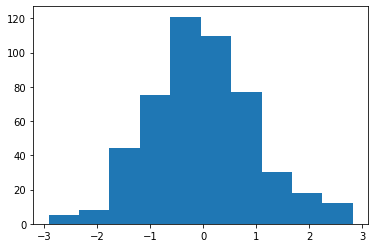

In [51]:
plt.hist(x_group["Age"])

In [53]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [54]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,151.347291,100.678025,42.062951,21499.975843
1,134.559133,0.099864,51.286688,21500.299958
2,179.380337,80.396117,52.427850,21498.666359
3,221.139830,67.390708,26.641977,21501.087111
4,154.820297,125.403275,40.685109,21501.247584
...,...,...,...,...
495,219.217424,73.196101,25.287881,21499.364752
496,142.723450,107.076677,42.113637,21498.613536
497,120.049842,93.559210,14.414695,21500.204050
498,148.734003,90.566238,21.168408,21499.385088


In [57]:
#Operacion diversas muy utiles 
#si queremos determinar una fila n-esima 
double_group.head(1) #Los primeros hombres o mujeres ricas, pobres, etc. 

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,151.347291,100.678025,42.062951,21499.975843
1,Male,Poor,134.559133,0.099864,51.286688,21500.299958
2,Female,Poor,179.380337,80.396117,52.427850,21498.666359
4,Male,Middle Class,154.820297,125.403275,40.685109,21501.247584
8,Female,Middle Class,182.295918,34.442721,28.545499,21500.141478
18,Female,Rich,151.523721,80.083658,19.320193,21498.939380


In [58]:
double_group.nth(32) #La fila 32 

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     167.508586  55.611713  15.221971  21499.559091
       Poor             168.726213  33.609296  26.162713  21498.626266
       Rich             201.084462  25.372177  25.765441  21500.658165
Male   Middle Class     163.207878  77.699799  37.531161  21500.558642
       Poor             182.721295  86.711029  26.328477  21500.711824
       Rich             155.694181  41.504367  13.658710  21499.719360

In [60]:
#Ordenar la informacion en funcion de las columnas mas relevantes, antes de crear el objeto agrupado. 
#si queremos ver las personas mas jovenes. 
data_sorted = data.sort_values(["Age", "Income"]) #Ordena por edad y nivel de ingresos. 

In [61]:
data_sorted.head(10) #Orden por edades 

,Gender,Economic Status,Height,Weight,Age,Income
434,Female,Rich,155.617192,22.064749,-3.635586,21498.574434
175,Male,Middle Class,142.955352,82.376504,-3.603170,21500.507540
240,Male,Middle Class,133.502397,75.515799,-0.462706,21499.754088
340,Female,Rich,133.276011,67.086436,0.275646,21498.975570
394,Male,Poor,158.233216,65.179282,0.804304,21501.348755
371,Male,Middle Class,174.301842,88.861065,2.148296,21500.110090
278,Female,Middle Class,195.121979,5.505734,3.221002,21498.424957
168,Female,Middle Class,176.941977,94.921147,4.040623,21499.052110
19,Female,Middle Class,144.816897,106.232764,7.533557,21498.754603
471,Female,Middle Class,199.806504,56.692364,7.547780,21501.117632


## 55. CONJUNTO DE ENTRENAMIENTO Y DE TESTING 

Un dataset se divide en conjunto de entrenamiento y de testing, aveces se divide en uno tercero que se llamada de validacion 
el de entrenamiento es con el que se construye el modelo. 
el de testing se usa para comprobar la eficacia de dicho modelo, 
El de entrenamiento sirve para ajustar el modelo. 



## 57. MUESTREO ALEATORIO: COMO DIVIDIR UN DATASET EN CONJUNTO DE ENTRENO Y VALIDACION 

In [63]:
#Cargaremos un dataframe para hacer pruebas. 
#usaremos 3 metodos distintos : 
import pandas as pd 

In [65]:
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/customer-churn-model/Customer Churn Model.txt")

In [66]:
len(data)

3333

In [67]:
#Primera forma es utilizar una division basado en un metodo aleatorio 
#Dividir usando la distribucion normal. 
a = np.random.randn(len(data)) #Datos aleatorios que se distribuyen de manera normal. 

(array([  6.,  28., 145., 456., 799., 907., 622., 283.,  76.,  11.]),
 array([-3.7272076 , -3.01367678, -2.30014596, -1.58661514, -0.87308432,
        -0.15955349,  0.55397733,  1.26750815,  1.98103897,  2.69456979,
         3.40810062]),
 <a list of 10 Patch objects>)

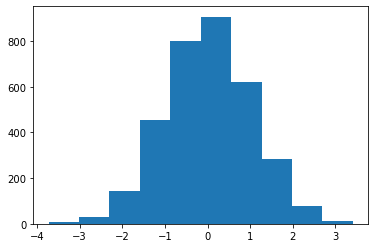

In [68]:
plt.hist(a) #Los datos estan distribuidos aproximanamente entre -3 y 3. 

In [75]:
#Si queremos hacer una division, de ese vector a, comprobar los objetos que son menores que un numero dado. 
check = (a<0.8)

In [76]:
check #es un vector de TRUE y FALSE. 

array([ True, False,  True, ...,  True,  True,  True])

In [83]:
training = data[check]
testing = data[~check]

In [84]:
len(training) #Este conjunto tiene aprox el 80% de los datos 

2608

In [87]:
len(testing) #Este tiene el 20% restante. 

725

In [ ]:
#Los hemos dividido segun el 80% de los datos, si lo queremos hacer por el 75% de los datos, repetimos lo mismo de arriba. 

2da forma es usando la libreria "SKLEARN"

In [91]:
#Esta es la libreria estandar para dividir un dataframe, tiene muchos metodos ya implementados para dividir un dataframe en 
#conjunto de entrenamiento y validacion. 
#la tecnica mas usada es la de la validacion cruzada, esto ya lo hace de manera automatica dicha funcion. 
from sklearn.model_selection import train_test_split  #Esta es la libreria que se usa en estos casos. 

In [92]:
#Definimos el conjunto de entrenamiento. 
train, test = train_test_split(data, test_size = 0.2)#El porcentaje del dataset original que se usara para testing.
#el 20% sera usada para cuestiones de testing. 

In [93]:
len(train) #el 80% va al conjunto de entrenamiento. 

2666

In [94]:
len(test) #20% va al conjunto de testing

667

USANDO UNA FUNCION DE SHUFFLE 

In [95]:
#la forma mas cool que existe. 
import numpy as np

In [96]:
#primero mezclamos las filas aleatoriamente y luego se asignan al conjunto de testing y entrenamiento basandose en la proporcion de datos. 
import numpy as np

In [99]:
#usando la libreria de sklearn 
import sklearn 
sklearn.utils.shuffle(data) #Esto mezcla las filas del dataframe. 

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2618,MD,116,510,399-5424,yes,yes,27,175.5,137,29.84,...,60,17.90,294.8,121,13.27,6.9,5,1.86,1,False.
1718,AZ,109,415,404-3106,yes,no,0,268.4,85,45.63,...,131,12.80,297.9,84,13.41,9.7,8,2.62,2,True.
1165,VT,50,415,387-5891,yes,yes,26,307.1,94,52.21,...,78,24.60,174.9,109,7.87,8.0,3,2.16,0,False.
560,VT,80,415,342-7514,no,no,0,160.6,103,27.30,...,109,20.15,245.1,88,11.03,10.7,1,2.89,1,False.
2617,SD,64,415,395-6758,no,no,0,174.5,98,29.67,...,103,15.32,179.0,89,8.06,10.7,2,2.89,2,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,OR,33,415,344-5973,yes,no,0,190.6,100,32.40,...,104,13.74,189.9,136,8.55,13.0,6,3.51,1,False.
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
2466,MD,83,408,404-5057,no,yes,38,107.9,90,18.34,...,94,11.93,253.6,79,11.41,10.5,2,2.84,0,False.
1206,IA,92,510,350-7344,no,yes,25,134.0,112,22.78,...,111,17.51,180.6,118,8.13,9.7,4,2.62,0,False.


In [100]:
#lo guardamos en la misma variable una vez que ha sido aleatorizado. 
data = sklearn.utils.shuffle(data)

In [102]:
cut_id = int(0.75*len(data)) #Creamos el identificador de corte. 


In [103]:
train_data = data[:cut_id]
test_data = data[cut_id+1 :]

In [104]:
len(train_data)

2499

In [105]:
len(test_data)

833

# 58. CONCATENAR DOS DATASETS POR FILAS 

In [1]:
import pandas as pd

In [2]:
read_wine = pd.read_csv("C:\Users\URIEL\Downloads\python-ml-course-master (2)\datasets\wine", sep = ";")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-2-cc3a07705cf3>, line 1)

In [5]:
read_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
#veamos las columnas que tiene el dataframe. 
read_wine.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [11]:
read_wine.shape #1599 botellas de vino distintas. 

(1599, 12)

In [3]:
white_wine = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/wine/winequality-white.csv", sep = ";")

In [4]:
white_wine.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [5]:
white_wine.shape

(4898, 12)

In [ ]:
#ambos dataframes son muy similares. 
#circuntancias ideales para aglutinar varios dataframes. 
#en python tenemos dos tipos de eje, axis = 0 - eje horizontal
#axis = 1 - eje vertical. 


In [17]:
#usaremos el metodo concat 
wine_data = pd.concat([read_wine, white_wine], axis = 0)

In [19]:
wine_data.shape las filas se han unido unas con las otras. 

(6497, 12)

# 59. CARGA DE CIENTOS DE DATOS DISTRIBUIDOS 

In [6]:
#Usaremos muchos datasets. 
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/distributed-data/001.csv")

In [7]:
data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [8]:
data.isna().sum()

Date          0
sulfate    1344
nitrate    1339
ID            0
dtype: int64

In [9]:
data.shape

(1461, 4)

In [11]:
#haremos una carga de todos los dataframes y luego concatenarlos. 
#importar el primer fichero. 
#hacemos un bucle para ir recorriendo todos y cada uno de los ficheros, 
#importante tener una consistencia en el nombre de los ficheros. 
#importamos los fichero uno a uno 
#cada uno de ellos debe de apendizarse (añadirse al final) del primero fichero que ya habiamos cargado. 
#repetmos el bucle hasta que no queden ficheros. 
filepath = "C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/distributed-data/"
data = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/distributed-data/001.csv")
for i in range(2,333): 
    if i < 10:
        filename = "00"+str(i)
    elif 10 <= i < 100: 
        filename = "0"+str(i)
    if i >=100:
        filename = str(i)
    file = filepath + filename + ".csv"
    temp_data = pd.read_csv(file)
    
    data = pd.concat([data, temp_data], axis = 0)


In [12]:
data.shape #hemos podido cargar varios dataframes. 

(772087, 4)

# 60. EJERCICIO: EL DATA SET DE LOS JUEGOS OLIMPICOS 

In [6]:
#Un analista necesita cruzar datos que provengan de distintas fuentes. 
#las bases de datos relacionales, donde existen multiples tablas concectadas a traves de una columna que esta presente en 
#varias tablas, sirve como puente para unir. 
#la relacion entre tablas es ese identificador, para unir varios dataframes en python. 
#pandas es la estandar para el manejo de datos. 
#innerjoin
#leftjoin
#rightjoin  TODAS ESTAS LAS VEREMOS EN DETALLE. 
import pandas as pd

In [11]:
filepath = "C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/athletes/"

In [12]:
#el dataframe con el que trabajaremos sera : 
data_main = pd.read_csv(filepath + "Medals.csv", encoding = "ISO-8859-1")

In [13]:
data_main.head() #Trae el nombre del atleta, la edad que tenian cuando ganaron la medalla respectiva. 
#la fecha de ceremonia de clausura de dicho año. 
#¿Los atletas aparecen sola una vez? R= NO. 

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [14]:
#Para preguntarle esto, es filtrar dicha columna. 
a = data_main["Athlete"].unique().tolist()
len(a) #atletas unicos hay 6956 pero el dataset original tiene 8618. 

6956

In [15]:
data_main.shape

(8618, 8)

In [16]:
data_country = pd.read_csv(filepath + "Athelete_Country_Map.csv", encoding = "ISO-8859-1")

In [17]:
data_country.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [18]:
#Un data frame que contiene informacion distinta a la anterior. 
data_country.shape #hay 15 filas extras. ¿Porque?, lo mas logica debe ser a que un mismo jugador olimipio a jugado para dos paises distintos. 

(6970, 2)

In [19]:
#¿Que hacemos con un usuario que haya participado dos veces? primero lo indentificamos 
data_country[data_country["Athlete"] == "Aleksandar Ciric"]


,Athlete,Country
1029,Aleksandar Ciric,Serbia
1086,Aleksandar Ciric,Serbia and Montenegro


In [20]:
#La solucion mas sencilla sera quedarnos con uno. 


In [21]:
#¿Un atleta podra estar en mas de un deporte? 
data_sports = pd.read_csv(filepath + "Athelete_Sports_Map.csv", encoding = "ISO-8859-1")

In [22]:
data_sports.head() #Un mismo jugador pudo haber jugado a dos juegos olimpicos diferentes. 

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [23]:
#filtraremos dicho target. 
data_sports[(data_sports["Athlete"] =="Chen Jing") | 
(data_sports["Athlete"] =="Richard Thompson") | 
(data_sports["Athlete"] =="Matt Ryan")
           ]

,Athlete,Sport
528,Richard Thompson,Athletics
1308,Chen Jing,Volleyball
1419,Chen Jing,Table Tennis
2727,Matt Ryan,Rowing
5003,Matt Ryan,Equestrian
5691,Richard Thompson,Baseball


¿Como unir cada uno de los 3?

# 61. CONCATENAR DATOS CON MERGE 

In [24]:
import pandas as pd

In [25]:
#Cruzaremos esos 3 datasets que tenemos, a traves de una columna que actua de clave, usando la funcion merge de pandas. 
data_main_country = pd.merge(left =data_main, right = data_country, left_on = "Athlete", right_on = "Athlete")#left el dataset que va de lado izquierdo y el otro de lado derecho. 

In [26]:
data_main_country.head() #Hemos combinado las tablas en una sola, a traves de la columna de Athlete. 

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [27]:
data_main_country.shape #son 40 mas que tenia el dataframe original, esto porque a llevado a cabo un inner join 
#al hacer este tipo de join cuando existen diferentes pares de clave valor presentes en ambos dataframes se hace la combinacion de ambos. 
#se han duplicado tambien las medallas. 

(8657, 9)

In [28]:
data_main_country[data_main_country["Athlete"] == "Aleksandar Ciric"] #ha duplicado sus medallas, porque pertencia a dos paises 


,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1503,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1504,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia and Montenegro
1505,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1506,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia and Montenegro
1507,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia
1508,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia and Montenegro


In [29]:
#Para corregir este error es eliminar las filas duplicadas. 
data_country_dp = data_country.drop_duplicates(subset = "Athlete") #Esto lo que nos hace es que nos quedamos con el subconjunto unico de atletas
#para cada uno de los atletas dejara solo un pais

In [30]:
len(data_country_dp) == len(a)

True

In [31]:
#Ahora podemos hacer el join 
data_main_country = pd.merge(left =data_main, right = data_country_dp, left_on = "Athlete", right_on = "Athlete")

In [32]:
data_main_country.shape

(8618, 9)

In [33]:
data_main_country[data_main_country["Athlete"] == "Aleksandar Ciric"]

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1491,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1492,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1493,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia


In [34]:
#en el mismo dataframe seria juntar informacion del deporte, todo en un mismo dataframe. 
#tenemos el mismo problema porque habiamos visto que habia gente que jugo dos deportes distintos. 

In [56]:
data_sports_dp = data_sports.drop_duplicates(subset = "Athlete")

In [36]:
len(data_sports_dp)  == len(a)

True

In [37]:
data_final = pd.merge(left = data_main_country, right = data_sports_dp, 
                     left_on = "Athlete", right_on = "Athlete")

In [38]:
data_final.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


In [39]:
data_final.shape #Nos devuelve el mismo numero con el que originalmente habiamos iniciado el analisis. 

(8618, 10)

## 62. FORMAS DE CRUZAR TABLAS CON JOINS 

Formas de juntar dataframes. 
Veremos 3 tipos de join: 
Inner Join,  
Left Join,  
Right Join,  

INNER JOIN 
* Si tenemos Dos DataFrames de tal manera que comparten cierta cantida n de filas. 
   * Si A tiene 50 filas 
   * Si B tiene 60 filas 
   * y ambos dataframes comparten 30,
* Entonces con A Inner Join B resultara un dataframe de 30 filas. 

In [40]:
from  IPython.display import Image

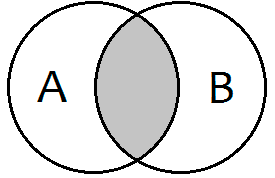

In [41]:
Image(filename = "C:/Users/URIEL/Downloads/python-ml-course-master (2)/notebooks/resources/inner-join.png")

LEFT JOIN 
* Devuelve un data frame con las filas que tuvieran valor en el dataset de la izquierda, sin importar si tienen correspondencia en el de la derecha o no. 
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho, tendran NAs en las columnas del data frame derecho. 
* El numero de filas sera igual al numero de filas del data frame izquierdo. 
      * Data Set A tiene 60 filas
      * Data Set tiene 50 filas 
      * Entonces A left Join B tendrá 60 filas 
* En terminos de teoria de conjuntos, se trata del propio data set de las izquierda quien, ademas tiene la interseccion en su interior. 
     

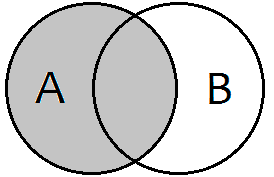

In [42]:
Image(filename ="C:/Users/URIEL/Downloads/python-ml-course-master (2)/notebooks/resources/left-join.png" )

RIGHT JOIN 
* Es lo contrario al Left Join

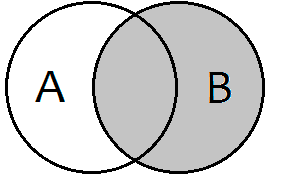

In [43]:
Image(filename ="C:/Users/URIEL/Downloads/python-ml-course-master (2)/notebooks/resources/right-join.png" )

Outer Join 
* $A$ + $B$ - $A \cap B$

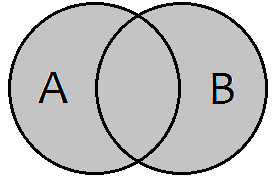

In [44]:
Image(filename = "C:/Users/URIEL/Downloads/python-ml-course-master (2)/notebooks/resources/outer-join.png")

## 63. ELIMINAR DATOS DE UN DATASETS CON RESTRICCIONES DE CONJUNTO 

In [45]:
#Prepararemos un poco los datos. 
import numpy as np

In [46]:
out_athletes = np.random.choice(data_main["Athlete"], size = 6, replace = False) #Funcion que escoge al azar, esos seran los 6 atletas que usaremos para 
#eliminar informacion de sus paises y sus deportes. 

In [58]:
data_country_dlt = data_country_dp[~data_country_dp["Athlete"].isin(out_athletes) & 
                                   (data_country_dp["Athlete"] != "Michael Phelps")]
#Esta funcion lo que hace es que de los paises me voy a quedar con los que no estan contenidos dentro del array de atletas 
#y tampoco es michael phelps. 

In [48]:
data_country_dlt.head() #Vemos que ha desaparecido Michael Phelps. 

,Athlete,Country
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States
5,Ryan Lochte,United States


In [49]:
len(data_country_dlt)

6949

In [50]:
#hemos eliminado 7 filas, las filas correspondientes a los 6 atletas y a michael phelps. 
len(data_country_dp) - len(data_country_dlt)

7

In [59]:
#Crearemos una version de deportes sin esos 7 individuos. 
data_sports_dlt = data_sports_dp[~data_sports_dp["Athlete"].isin(out_athletes) & 
                                   (data_sports_dp["Athlete"] != "Michael Phelps")]

In [60]:
len(data_sports_dlt) #Cada uno de los individuos tiene un deporte

6949

In [61]:
#Lo haremos con el data global 
data_main_dlt = data_main[(~data_main["Athlete"].isin(out_athletes)) & 
                         (data_main["Athlete"] != "Michael Phelps")]

In [62]:
len(data_main_dlt) #Hemos eliminado mas de 7, porque phelps ha ganado mas de una ves en otros paises. 

8605

## 64. EJEMPLO DE JOINS CON PYTHON 

In [63]:
#Usaremos un dataframe que contenga toda la informacion, 
#con uno que le falte una parte, le falta la informacion de 7 atletas, 
#¿Cual es el resultado de hacer un inner join? 
merged_inner = pd.merge(left = data_main, right = data_country_dlt, how = "inner", left_on = "Athlete", right_on = "Athlete")

In [64]:
len(merged_inner) #Este dataset nos dara informacion para los atletas que estan en ambos dataframes. 

8605

In [66]:
3merged_inner.head() #informacion que solo esta en dos datasets. 

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
1,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States
2,Natalie Coughlin,29.0,2012,08/12/2012,0,0,1,1,United States
3,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia
4,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,Australia


In [69]:
#Left Join 
merged_left = pd.merge(left = data_main, right = data_country_dlt, 
                      how = "left", left_on = "Athlete", right_on = "Athlete")
len(merged_left)

8618

In [71]:
merged_left.head() #La longitud del dataframe de la izquierda dictamina el tamaño del dataset. 

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia


In [79]:
merged_right = pd.merge(left = data_main_dlt, right = data_country_dp, 
                        how = "right", left_on = "Athlete", right_on = "Athlete")

In [80]:
len(merged_right)

8612

In [83]:
merged_right.tail(10)

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8602,Wietse van Alten,21.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Netherlands
8603,Sandra Wagner-Sachse,31.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Germany
8604,Rod White,23.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,United States
8605,Michael Phelps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
8606,Nicolas Lopez,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
8607,Igor Vuurovic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Serbia and Montenegro
8608,Crystl Bustos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
8609,Ester Workel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands
8610,Marianne Vos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netherlands
8611,Hanka Kupfernagel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany


In [85]:
#Outer Join 
#no aporta ninguna diferencia. 
#si elimino alguno que otro atleta o añade al de paises. 
data_country_jb = data_country_dlt.append(
    {
    "Athlete" : "Angel Uriel Clavellina", 
    "Country": "Mexico"
    }, ignore_index = True
)

In [86]:
#para ver el ejemplo del outer join 
merged_outer = pd.merge(left = data_main, right = data_country_jb, 
                       how = "outer", left_on = "Athlete", right_on = "Athlete")

In [87]:
len(merged_outer)

8619

In [88]:
merged_outer.tail() 

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8614,Kateryna Serdiuk,17.0,2000.0,10/01/2000,0.0,1.0,0.0,1.0,Ukraine
8615,Wietse van Alten,21.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Netherlands
8616,Sandra Wagner-Sachse,31.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Germany
8617,Rod White,23.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,United States
8618,Angel Uriel Clavellina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mexico


Todo lo que se ha hecho es todo lo que se necesita saber para hacernos llamar cientifico de datos. 